# APPLIED DATA SCIENCE CAPSTONE PROJECT
#### This notebook will be used for the IBM Applied Data Science Capstone Project course

### WEEK 3 - Segmenting and Clustering Neighborhoods in Toronto

In [1]:
import pandas as pd
import numpy as np

#### QUESTION 1 - Create Toronto neighborood pandas Dataframe by scraping Wikipedia page

First of all, let's scrape the html Wikipedia page ad save it into a pandas dataframe

In [2]:
# Read the html table using pandas read_html
wiki_tables = pd.read_html('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')

# There are only 2 tables in the page: we need the first one
wiki_table_df = wiki_tables[0]
wiki_table_df.head()

,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


Now let's process the dataframe as required by the assignment

In [3]:
# First, delete the rows with 'Not assigned' Neightborohood
neigh_df = wiki_table_df[wiki_table_df['Borough'] != 'Not assigned'].reset_index(drop=True)
print('Toronto Boroughts:',neigh_df['Borough'].unique())

Toronto Boroughts: ['North York' 'Downtown Toronto' 'Etobicoke' 'Scarborough' 'East York'
 'York' 'East Toronto' 'West Toronto' 'Central Toronto' 'Mississauga']


In [4]:
# Check if 'Not assigned' neighboroods exist
not_ass_neigh_df = neigh_df[neigh_df['Neighbourhood'] == 'Not assigned']
not_ass_neigh_df.head()

,Postal Code,Borough,Neighbourhood


In [5]:
# Display the obtained dataframe with its shape
neigh_df.columns = ['PostalCode', 'Borough', 'Neighborhood']
neigh_df.head(12)

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
6,M1B,Scarborough,"Malvern, Rouge"
7,M3B,North York,Don Mills
8,M4B,East York,"Parkview Hill, Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"


In [6]:
print('Shape of the neighborhood dataframe:',neigh_df.shape)

Shape of the neighborhood dataframe: (103, 3)


#### QUESTION 2 - Retrieve latitudes and longitudes of each neighborhood

In [7]:
# Use csv file to retrieve the coordinates
coord_df = pd.read_csv('http://cocl.us/Geospatial_data')
coord_df.columns = ['PostalCode', 'Latitude', 'Longitude']
coord_df.head()

,PostalCode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [8]:
# Check if the shape of the dataset matches with the neighborhood dataframe
print('Shape of the coordinates dataframe:',coord_df.shape)

Shape of the coordinates dataframe: (103, 3)


In [9]:
# Join the neighborhood dataset with the coordinates dataset
neigh_coord_df = neigh_df.join(coord_df.set_index('PostalCode'), on='PostalCode')
neigh_coord_df.head(12)

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village",43.667856,-79.532242
6,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
7,M3B,North York,Don Mills,43.745906,-79.352188
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937


In [10]:
print('Shape of the merged dataframe:',neigh_coord_df.shape)

Shape of the merged dataframe: (103, 5)


#### QUESTION 3 - Cluster Toronto neighborood

In [23]:
#!pip install folium
import folium
import requests
from geopy.geocoders import Nominatim

First create the Toronto map with all the neighborhoods

In [25]:
# Get Toronto coordinates
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode('Toronto')
    
# Create Toronto map with folium
toronto_map = folium.Map(location=[location.latitude, location.longitude], zoom_start=11)

# Add all the neighborhoods to the map
for lat, lng, borough, neighborhood in zip(neigh_coord_df['Latitude'], neigh_coord_df['Longitude'], neigh_coord_df['Borough'], neigh_coord_df['Neighborhood']):
    label = '{} - {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(toronto_map)  
    
toronto_map    

Let's explore the Downtown Toronto neighborhood

In [33]:
# Get East York Toronto Dataframe
downt_neigh_coord_df = neigh_coord_df[neigh_coord_df['Borough'] == 'Downtown Toronto'].reset_index(drop=True)
downt_neigh_coord_df.head(12)

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
5,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
6,M6G,Downtown Toronto,Christie,43.669542,-79.422564
7,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568
8,M5J,Downtown Toronto,"Harbourfront East, Union Station, Toronto Islands",43.640816,-79.381752
9,M5K,Downtown Toronto,"Toronto Dominion Centre, Design Exchange",43.647177,-79.381576


In [75]:
# Get Downtown Toronto coordinates
location = geolocator.geocode('Downtown Toronto, Toronto')
    
# Create Downtown Toronto map with folium
downt_toronto_map = folium.Map(location=[location.latitude, location.longitude], zoom_start=13)

# Add the neighborhoods to the map
for lat, lng, neighborhood in zip(downt_neigh_coord_df['Latitude'], 
                                  downt_neigh_coord_df['Longitude'], 
                                  downt_neigh_coord_df['Neighborhood']):
    label = folium.Popup(neighborhood, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(downt_toronto_map)  
    
downt_toronto_map    

In [38]:
# The code was removed by Watson Studio for sharing.

Explore the venues in Downtown Toronto by using Foursquare api

In [36]:
# Function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
    
# Function to extract venus for neighborhoods latitudes and longitudes
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
            
        # Create the Foursquare API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # Make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # Return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                             'Neighborhood Latitude', 
                             'Neighborhood Longitude', 
                             'Venue', 
                             'Venue Latitude', 
                             'Venue Longitude', 
                             'Venue Category']
    
    return(nearby_venues)

In [39]:
# Retrieve all venues for Downtown Toronto
downtown_venues = getNearbyVenues(names=downt_neigh_coord_df['Neighborhood'], 
                                  latitudes=downt_neigh_coord_df['Latitude'], 
                                  longitudes=downt_neigh_coord_df['Longitude']
                                 )
downtown_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Regent Park, Harbourfront",43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,"Regent Park, Harbourfront",43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,"Regent Park, Harbourfront",43.65426,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
3,"Regent Park, Harbourfront",43.65426,-79.360636,Morning Glory Cafe,43.653947,-79.361149,Breakfast Spot
4,"Regent Park, Harbourfront",43.65426,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa


Create dataframe that contains the ten most common venues for each neighborhood

In [42]:
# 1 - Perform one hot encoding of the dataframe venues
# Encoding
downtown_onehot = pd.get_dummies(downtown_venues[['Venue Category']], prefix="", prefix_sep="")

# Add neighborhood column back to dataframe
downtown_onehot['Neighborhood'] = downtown_venues['Neighborhood'] 

# Move neighborhood column to the first column
fixed_columns = [downtown_onehot.columns[-1]] + list(downtown_onehot.columns[:-1])
downtown_onehot = downtown_onehot[fixed_columns]

downtown_onehot.head()

,Yoga Studio,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,...,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
# Group each neighborhood by frequency of venue
downtown_grouped = downtown_onehot.groupby('Neighborhood').mean().reset_index()
downtown_grouped

,Neighborhood,Yoga Studio,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar
0,Berczy Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.017241,0.000000,0.000000,0.00,0.00,0.017241,0.00000,0.000000,0.000000
1,"CN Tower, King and Spadina, Railway Lands, Har...",0.000000,0.066667,0.066667,0.066667,0.133333,0.066667,0.133333,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.00000,0.000000,0.000000
2,Central Bay Street,0.016667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.033333,0.000000,0.000000,0.00,0.00,0.016667,0.00000,0.000000,0.016667
3,Christie,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.00000,0.000000,0.000000
4,Church and Wellesley,0.025316,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012658,0.000000,...,0.00,0.012658,0.012658,0.012658,0.00,0.00,0.000000,0.00000,0.012658,0.000000
5,"Commerce Court, Victoria Hotel",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,0.000000,...,0.01,0.020000,0.000000,0.000000,0.00,0.00,0.020000,0.00000,0.000000,0.010000
6,"First Canadian Place, Underground city",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030000,0.000000,...,0.01,0.020000,0.010000,0.000000,0.00,0.01,0.010000,0.00000,0.000000,0.010000
7,"Garden District, Ryerson",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.01,0.010000,0.020000,0.000000,0.00,0.00,0.000000,0.01000,0.010000,0.010000
8,"Harbourfront East, Union Station, Toronto Islands",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.01,0.000000,0.010000,0.000000,0.00,0.01,0.010000,0.00000,0.000000,0.010000
9,"Kensington Market, Chinatown, Grange Park",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.047619,0.00000,0.047619,0.015873


In [45]:
# 3 - Create the dataframe with the top 10 most common venues

# Function to return the top n venues by ordering them in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

# Define number of venues and number indicators
num_top_venues = 10
indicators = ['st', 'nd', 'rd']

# Create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# Create the new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = downtown_grouped['Neighborhood']

for ind in np.arange(downtown_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(downtown_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Coffee Shop,Cocktail Bar,Seafood Restaurant,Beer Bar,Bakery,Cheese Shop,Restaurant,Farmers Market,Japanese Restaurant,Beach
1,"CN Tower, King and Spadina, Railway Lands, Har...",Airport Lounge,Airport Terminal,Boat or Ferry,Harbor / Marina,Sculpture Garden,Rental Car Location,Plane,Coffee Shop,Boutique,Airport Service
2,Central Bay Street,Coffee Shop,Italian Restaurant,Café,Sandwich Place,Thai Restaurant,Salad Place,Burger Joint,Bubble Tea Shop,Portuguese Restaurant,Indian Restaurant
3,Christie,Grocery Store,Café,Park,Restaurant,Candy Store,Italian Restaurant,Baby Store,Coffee Shop,Nightclub,Dog Run
4,Church and Wellesley,Coffee Shop,Sushi Restaurant,Japanese Restaurant,Gay Bar,Restaurant,Fast Food Restaurant,Pub,Café,Hotel,Yoga Studio


Now perform clustering using K means, testing different values of K

In [78]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

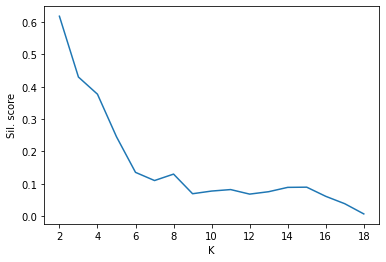

In [73]:
# Prepare dataset
downtown_grouped_clustering = downtown_grouped.drop('Neighborhood', 1)

# Test from 2 to 10 clusters
k_values = np.linspace(2, 18, 17).astype('int')
scores = []

# For each number of clusters, perform k means and save silhouette score
for k in k_values:
    km = KMeans(n_clusters=k, random_state=1).fit(downtown_grouped_clustering)
    scores.append(silhouette_score(downtown_grouped_clustering, km.labels_))

# Plot the score vs number of clusters
plt.plot(k_values, scores)
plt.xlabel('K')
plt.ylabel('Sil. score')
plt.show()

Let's group in 4 clusters, since from 5 clusters on seems to be too much.
Add the labels to the dataset

In [76]:
# Retrieve the labels and add them to the dataframe
km4 = KMeans(n_clusters=4, random_state=1).fit(downtown_grouped_clustering)

# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', km4.labels_)

downtown_merged = downt_neigh_coord_df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
downtown_merged = downtown_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

downtown_merged.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,0,Coffee Shop,Pub,Bakery,Park,Café,Theater,Breakfast Spot,Gym / Fitness Center,Electronics Store,Performing Arts Venue
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,0,Coffee Shop,College Cafeteria,Sushi Restaurant,Diner,Smoothie Shop,Beer Bar,Italian Restaurant,Sandwich Place,Restaurant,Distribution Center
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,0,Coffee Shop,Clothing Store,Café,Middle Eastern Restaurant,Japanese Restaurant,Cosmetics Shop,Bubble Tea Shop,Hotel,Ramen Restaurant,Lingerie Store
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,0,Coffee Shop,Café,Gastropub,Cocktail Bar,American Restaurant,Art Gallery,Restaurant,Cheese Shop,Seafood Restaurant,Clothing Store
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,0,Coffee Shop,Cocktail Bar,Seafood Restaurant,Beer Bar,Bakery,Cheese Shop,Restaurant,Farmers Market,Japanese Restaurant,Beach


Create the map of the clusters

In [79]:
# Create map
map_clusters = folium.Map(location=[location.latitude, location.longitude], zoom_start=13)

# Set color scheme for the clusters
kclusters = 4
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# Add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(downtown_merged['Latitude'], 
                                  downtown_merged['Longitude'], 
                                  downtown_merged['Neighborhood'], 
                                  downtown_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters